In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam

In [2]:
dataset=pd.read_excel(r'C:\Users\fhasan1\data.xlsx', header=None, sheet_name=0)
dataset=np.array(dataset)
print(dataset.shape)

(6669, 169)


In [3]:
inputDemand=dataset[0:,0:168]
target=dataset[0:,-1]

print(inputDemand.shape)
print(target.shape)

(6669, 168)
(6669,)


In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(inputDemand,target,test_size = 0.5,random_state = 1 ,shuffle=True)#Import svm model

In [5]:
# SVM model
from sklearn import svm
model_svm = svm.SVC(kernel='linear') # Linear Kernel
model_svm.fit(x_train, y_train)

y_pred_svm = model_svm.predict(x_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_svm)

array([[1545,    0,    0,    0,    0],
       [   0,  529,    0,    0,    0],
       [   0,    0,  367,    0,    0],
       [   0,    0,    0,  531,    0],
       [   0,    0,    0,    0,  363]], dtype=int64)

In [6]:
# XGBoost model
import xgboost as xgb 
model_xgb = xgb.XGBClassifier() 
model_xgb.fit(x_train, y_train) 
   
# Predicting the Test set results 
y_pred_xgb = model_xgb.predict(x_test) 
   
# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test, y_pred_xgb)

array([[1545,    0,    0,    0,    0],
       [   6,  521,    0,    2,    0],
       [   0,    0,  367,    0,    0],
       [   1,    0,    0,  530,    0],
       [   1,    0,    0,    0,  362]], dtype=int64)

In [7]:
# NN Model
import tensorflow as tf
one_hot_y_train = tf.keras.utils.to_categorical(y_train)
print(one_hot_y_train.shape)

model_NN = Sequential()
model_NN.add(Dense(256, input_dim=np.size(inputDemand,1), activation='relu'))
model_NN.add(Dense(5, activation='softmax'))

#callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath= r'C:\powercode\My Papers\Farnaz paper\_{epoch}',save_freq='epoch')]
#history_NN = model_NN.fit(x_train, one_hot_y_train, epochs=2, batch_size=500,callbacks=callbacks,verbose=2,validation_split=0.2)

model_NN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_NN = model_NN.fit(x_train, one_hot_y_train, epochs=500, batch_size=500, verbose=5,validation_split=0.2)

(3334, 5)
Train on 2667 samples, validate on 667 samples
Epoch 1/500
Epoch 2/500
Epoch 3/500
Epoch 4/500
Epoch 5/500
Epoch 6/500
Epoch 7/500
Epoch 8/500
Epoch 9/500
Epoch 10/500
Epoch 11/500
Epoch 12/500
Epoch 13/500
Epoch 14/500
Epoch 15/500
Epoch 16/500
Epoch 17/500
Epoch 18/500
Epoch 19/500
Epoch 20/500
Epoch 21/500
Epoch 22/500
Epoch 23/500
Epoch 24/500
Epoch 25/500
Epoch 26/500
Epoch 27/500
Epoch 28/500
Epoch 29/500
Epoch 30/500
Epoch 31/500
Epoch 32/500
Epoch 33/500
Epoch 34/500
Epoch 35/500
Epoch 36/500
Epoch 37/500
Epoch 38/500
Epoch 39/500
Epoch 40/500
Epoch 41/500
Epoch 42/500
Epoch 43/500
Epoch 44/500
Epoch 45/500
Epoch 46/500
Epoch 47/500
Epoch 48/500
Epoch 49/500
Epoch 50/500
Epoch 51/500
Epoch 52/500
Epoch 53/500
Epoch 54/500
Epoch 55/500
Epoch 56/500
Epoch 57/500
Epoch 58/500
Epoch 59/500
Epoch 60/500
Epoch 61/500
Epoch 62/500
Epoch 63/500
Epoch 64/500
Epoch 65/500
Epoch 66/500
Epoch 67/500
Epoch 68/500
Epoch 69/500
Epoch 70/500
Epoch 71/500
Epoch 72/500
Epoch 73/500
Epo

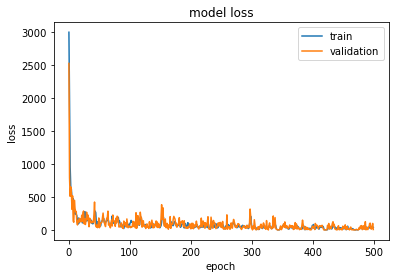

(3335, 5)


array([[1545,    0,    0,    0,    0],
       [   0,  529,    0,    0,    0],
       [   0,    0,  367,    0,    0],
       [   0,  351,    0,  180,    0],
       [   0,    0,    0,    0,  363]], dtype=int64)

In [8]:
import matplotlib.pyplot as plt

plt.plot(history_NN.history['loss'])
plt.plot(history_NN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

#prediction 
y_pred_NN=model_NN.predict(x_test)
y_pred_NN=np.round(y_pred_NN)
print(y_pred_NN.shape)

# Multi class confusion matrix
from sklearn.metrics import confusion_matrix
y_pred_NN=tf.argmax(y_pred_NN, axis=1)
confusion_matrix(y_test, y_pred_NN)